# Netflix Movies and TV Shows - Exploratory Data Analysis

This notebook explores the Netflix Movies and TV Shows dataset from Kaggle.  
The dataset contains information about titles on Netflix, such as type (Movie or TV Show), release year, rating, duration, country, and genres.

## Goals of this analysis:
- Understand the composition of Netflix content (movies vs TV shows)
- Explore ratings, release years, and when content was added to Netflix
- Look at popular countries and genres on the platform

## Setup and Import Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Pandas Exploration
This section examines structural patterns within the dataset, including content type distribution, rating characteristics, temporal trends, and genre composition.  
The goal is to establish a high-level understanding of Netflix’s catalogue before visualising the findings.

### Content Type Distribution

In [15]:
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

The output above shows the frequency of each content type in the dataset. This provides a quick overview of how Netflix's catalogue is divided between Movies and TV Shows.

### Ratings by Content Type

In [24]:
df.groupby(["type", "rating"]).size()

type     rating  
Movie    66 min         1
         74 min         1
         84 min         1
         G             41
         NC-17          3
         NR            75
         PG           287
         PG-13        490
         R            797
         TV-14       1427
         TV-G         126
         TV-MA       2062
         TV-PG        540
         TV-Y         131
         TV-Y7        139
         TV-Y7-FV       5
         UR             3
TV Show  NR             5
         R              2
         TV-14        733
         TV-G          94
         TV-MA       1145
         TV-PG        323
         TV-Y         176
         TV-Y7        195
         TV-Y7-FV       1
dtype: int64

The summary above shows the number of movie titles for each rating category, grouped by content type. This highlights how ratings are distributed across Movies and TV Shows.

### Recent Release Overview

In [47]:
df.sort_values("release_year", ascending = False)[["title", "release_year"]].head(10)

,title,release_year
693,Ali & Ratu Ratu Queens,2021
781,Black Holes | The Edge of All We Know,2021
762,Sweet & Sour,2021
763,Sweet Tooth,2021
764,Trippin' with the Kandasamys,2021
765,Xtreme,2021
766,Alan Saldaña: Locked Up,2021
767,Creator's File: GOLD,2021
768,Dancing Queens,2021
770,Myriam Fares: The Journey,2021


The table above displays the titles with the most recent release years in the dataset. Sorting by release_year highlights the newest additions to the catalogue.

### Annual Availability on Netflix

In [84]:
df["date_added"] = df["date_added"].astype(str)
# nan has to be converted to string so that str.strip() can work
df["date_added"] = pd.to_datetime(df["date_added"].str.strip(), errors = "coerce") 
# str.strip() used to remove leading and trailing spaces
# errors = "coerce" used to avoid crashes from invalid dates
df["year_added"] = df["date_added"].dt.year
df["year_added"] = df["year_added"].astype("Int64")
df["year_added"].value_counts().sort_index()

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: count, dtype: Int64

The yearly distribution shows rapid growth in Netflix additions from 2016 to 2019, with 2019 representing the peak.  
Additions decline slightly in 2020 and fall further in 2021.


### Content Growth by Type

In [117]:
df.groupby(["type", "year_added"]).size().unstack()

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
type,,,,,,,,,,,,,,
Movie,1.0,2.0,1.0,13.0,3.0,6.0,19.0,56.0,253.0,839.0,1237.0,1424.0,1284.0,993.0
TV Show,1.0,NaN,NaN,NaN,NaN,5.0,5.0,26.0,176.0,349.0,412.0,592.0,595.0,505.0


The table above shows that Movies dominate yearly additions throughout the entire period, while TV Shows grow more gradually. The gap between the two stays large, showing that Netflix prioritized expanding its Movie catalog more than its TV catalog.


### Genre Composition

In [35]:
df["genres"] = df["listed_in"].str.split(",")
df["genres"] = df["genres"].apply(lambda genres: [x.strip() for x in genres])
df_exploded = df.explode("genres")
df_exploded.groupby("genres").size().sort_values(ascending = False)

# df["genres"] = df["listed_in"].str.split(",")
# def clean_genres(genres):
    # cleaned_list = []
    # for x in genres:
        # cleaned_value = x.strip()
        # cleaned_list.append(cleaned_value)
    # return cleaned_list
# df["genres"] = df["genres"].apply(clean_genres)
# df.explode("genres").groupby("genres").size().sort_values(ascending = False)

genres
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                

After cleaning and exploding the listed_in column, we counted how often each genre appears. The most common genres include international movies, dramas, and comedies, while niche genres appear far less often.


### Bar Chart : Content Type Distribution

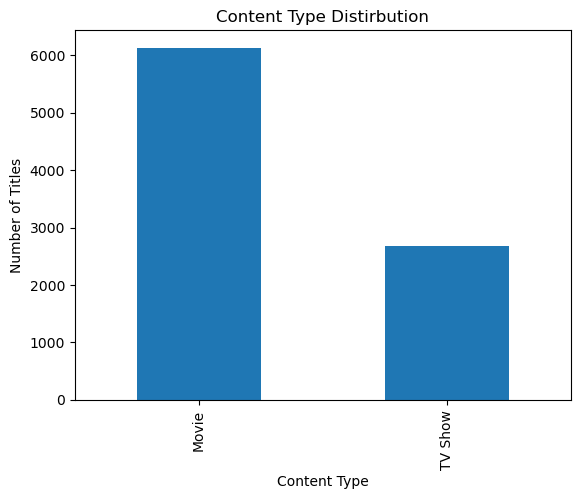

In [17]:
df.groupby("type").size().plot(kind = "bar")
plt.title("Content Type Distirbution")
plt.ylabel("Number of Titles")
plt.xlabel("Content Type")
plt.show()

### Bar Chart : Top 10 Genres

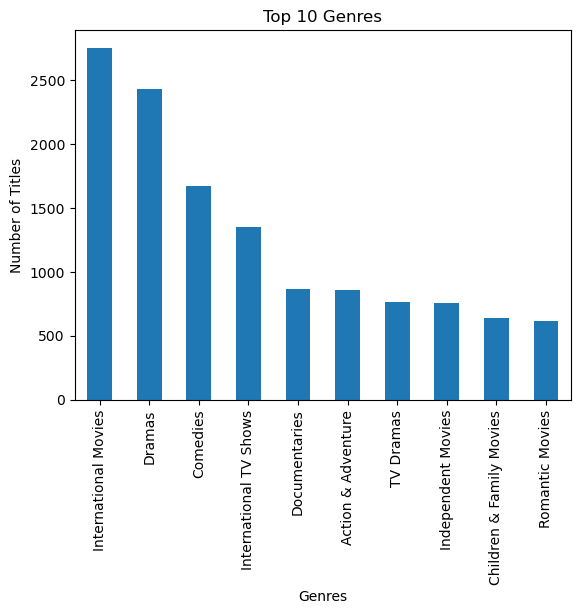

In [72]:
df_exploded["genres"].value_counts().sort_values(ascending = False).head(10).plot(kind = "bar")
plt.title("Top 10 Genres")
plt.ylabel("Number of Titles")
plt.xlabel("Genres")
plt.show()

The chart shows the top ten genres, with international ovies**, dramas, and comedies appearing most often.

### Line Graph : Titles Added Per Year

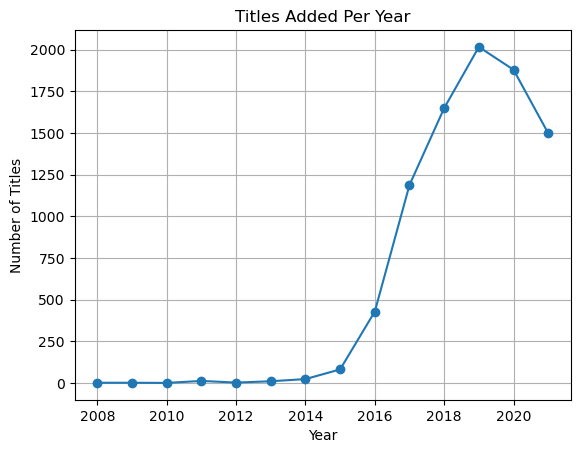

In [109]:
df["year_added"].value_counts().sort_index().plot(kind = "line", marker = "o")
plt.title("Titles Added Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

The line graph shows rapid growth in Netflix additions from 2016 to 2019, with 2019 representing the peak. 
Additions decline slightly in 2020 and fall further in 2021.

## Conclusion
This analysis showed clear differences in content type, ratings, and genre composition, as well as noticeable changes in how many titles were added each year. These patterns highlight which genres and content types dominate the platform and how Netflix’s catalog has expanded and shifted over time. Further exploration could focus on specific countries or genre–type relationships to gain deeper insights into Netflix’s content strategy.
